# Analyze Stock Prices
The goal of this notebook is to analyze prices of stocks, which we will accomplish by extracting stock prices from an online source, such as Yahoo Finance or MorningStar, and analyze and visualise it.

We will try to address the following specific questions:

  * How to download/extract prices from an online source?
  * Historic change of a Stock's price over time?
  * Calculate the daily return average of a stock.
  * What was the correlation between daily returns of different stocks?
  * Use Monte Carlo or Machine Learning models to predict future stock prices.

In [1]:
#Import libraries
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas_datareader.data as web
from datetime import datetime
from __future__ import division

We will first create a list of stocks that we are interested in analyzing in this study. In `stocks` variable store the stock ticker. We will set the period of analysis using `start` and `end` variables. Then, using `DataReader` we will read historic open, close, high, and low prices from an online source (e.g. Morning Star). Here we will explore stock prices of five entities that are associated with green energy infrastructure, namely:
  * HASI - Hannon Armstrong Sustainable Infrastructure Capital Inc.
  * PEGI - Pattern Energy Group Inc Class A
  * CAFD - 8point3 Energy Partners LP A
  * BEP - Brookfield Renewable Partners LP
  * CVA - Covanta Holding Corp

In [2]:
# Create a list of stocks to analyze
stocks = ['HASI','PEGI','CAFD','BEP','CVA']

# Lets set today's date as the time up to which the analysis has to be carried out
end = datetime.now()

# Set the historic analysis period in years (yrs = 1), and initialize the start date
yrs = 1
start = datetime(end.year-yrs,end.month,end.day) 

#Using Yahoo Finance/MorningStar to grab the stock data
for stock in stocks:
    globals()[stock] = web.DataReader(stock,'morningstar',start,end) #The globals method sets the stock name to a global variable

The advantage of using the `globals()` method is that each stock-ticker is stored as a variable and is available across this notebook and within all local functions. We then call `head()` and `describe()` to inspect the stock prices stored in the dataframe. The `head()` method shows the top five records in the dataframe (similarly, think about the ouput produced by the `tail()` method). The `describe()` method on the other hand shows the summary statistics of each column (high, low, open, close, volume etc.) of the dataframe.

In [3]:
HASI.tail()

Close   High    Low   Open  Volume
Symbol Date                                          
HASI   2018-03-22  18.80  19.13  18.70  18.70  309696
       2018-03-23  18.83  18.97  18.78  18.83  339865
       2018-03-26  19.03  19.08  18.61  18.99  459347
       2018-03-27  19.29  19.50  18.84  19.01  442178
       2018-03-28  19.33  19.52  19.16  19.30  310576

In [4]:
HASI.describe()

,Close,High,Low,Open,Volume
count,261.000000,261.000000,261.000000,261.000000,2.610000e+02
mean,22.473755,22.687844,22.273492,22.484713,3.285889e+05
std,1.724586,1.712731,1.743008,1.727596,2.537594e+05
min,17.600000,17.900000,17.330000,17.590000,0.000000e+00
25%,21.760000,21.940000,21.600000,21.760000,2.035610e+05
50%,23.010000,23.130000,22.830000,23.030000,2.718030e+05
75%,23.770000,24.040000,23.510000,23.750000,3.873910e+05
max,25.220000,25.280000,24.800000,25.220000,2.858697e+06


# Historic performance of a stock
Once we have the historic stock prices (open, close, high, low, etc) loaded in individual dataframes, we can plot their time series to visualize stock price movements. The figure below shows the closing price of HASI over the periof 03/29/2017 to 03/29/2018. The figure helps us visualize the daily volatility in prices, the price movement pattern, as well as the low and high prices over the last one year.

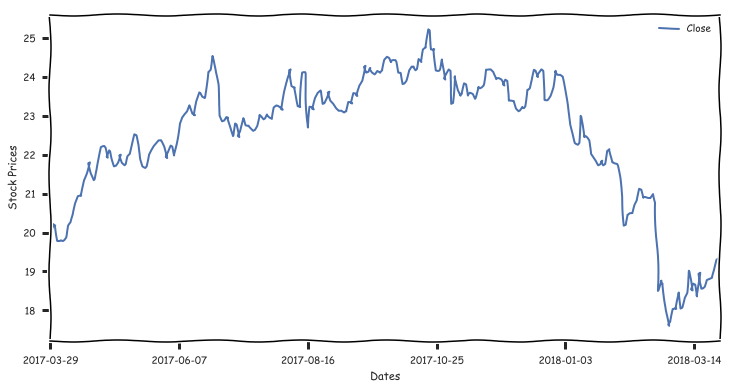

In [5]:
#Plotting the stock's closing price
plt.figure(figsize=(12,6))
plt.xkcd()
fig = HASI['Close'].plot(legend=True)
labels = [item.get_text()[7:17] for item in fig.get_xticklabels()]
fig.set_xticklabels(labels)
plt.xlabel('Dates')
plt.ylabel('Stock Prices')
plt.show()


Given the high volatility in daily stock value, it is often useful to calculate moving averages (MA) over different periods to visualize a smoother pattern of price movement. We begin by calculating the moving averages using `rolling()` method and saving it as a new column in the dataframe. As an example, below we show the computations of moving averages (7-days, 15-days, 30-days, and 60-days) for HASI. After computing the MA, notice that initial few rows (visualized using `head()` method) corresponding to `[mv_avg_days-1]` days have NaN values.

In [6]:
mv_avg_days = [7,15,30,60] #days

for mv in mv_avg_days:
    column_nm = "MA of %s days" %(str(mv))
    HASI[column_nm] = HASI['Close'].rolling(window=mv,center=False).mean()

HASI.head()

Close    High    Low   Open  Volume  MA of 7 days  \
Symbol Date                                                            
HASI   2017-03-29  19.92  20.030  19.75  19.78  329225           NaN   
       2017-03-30  20.22  20.300  19.93  20.05  430212           NaN   
       2017-03-31  20.20  20.290  20.14  20.23  644570           NaN   
       2017-04-03  19.79  19.910  19.67  19.89  324603           NaN   
       2017-04-04  19.82  19.869  19.57  19.74  316627           NaN   

                   MA of 15 days  MA of 30 days  MA of 60 days  
Symbol Date                                                     
HASI   2017-03-29            NaN            NaN            NaN  
       2017-03-30            NaN            NaN            NaN  
       2017-03-31            NaN            NaN            NaN  
       2017-04-03            NaN            NaN            NaN  
       2017-04-04            NaN            NaN            NaN

In [7]:
HASI.tail()

Close   High    Low   Open  Volume  MA of 7 days  \
Symbol Date                                                           
HASI   2018-03-22  18.80  19.13  18.70  18.70  309696     18.680000   
       2018-03-23  18.83  18.97  18.78  18.83  339865     18.701429   
       2018-03-26  19.03  19.08  18.61  18.99  459347     18.797143   
       2018-03-27  19.29  19.50  18.84  19.01  442178     18.842857   
       2018-03-28  19.33  19.52  19.16  19.30  310576     18.952857   

                   MA of 15 days  MA of 30 days  MA of 60 days  
Symbol Date                                                     
HASI   2018-03-22      18.509333      19.163333      20.642167  
       2018-03-23      18.562667      19.101000      20.555000  
       2018-03-26      18.630000      19.041333      20.471167  
       2018-03-27      18.685333      18.980333      20.392500  
       2018-03-28      18.770667      18.928333      20.322667

After we calculate the moving averages, we can visualize them by superimposing the MA values over the historic daily stock price. From the figure below we can immediately note that the pattern for MAs closely match the daily price movements when the moving window is small (e.g. 7-days, shown as green colored line), on the other hand larger moving windows (e.g. 60-days, shown as yellow colored line) denote long term stock movement pattern and are typically void of any volatilities. 

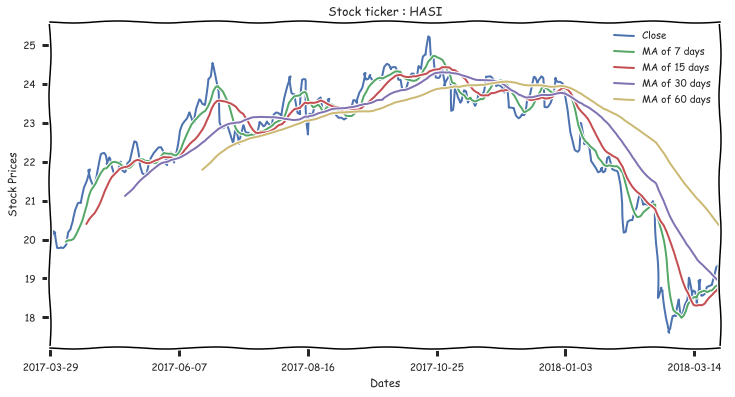

In [8]:
#plt.figure()
#plt.xkcd()
fig = HASI[['Close','MA of 7 days','MA of 15 days','MA of 30 days','MA of 60 days']].plot(subplots=False,figsize=(12,6))
labels = [item.get_text()[7:17] for item in fig.get_xticklabels()]
fig.set_xticklabels(labels)
plt.xlabel('Dates')
plt.ylabel('Stock Prices')
plt.title('Stock ticker : HASI')
plt.show()

# Historic Stock returns

In [9]:
HASI['Pct Return'] = HASI['Close'].pct_change() # Calculates daily percentage return
HASI['Pct Return'].tail()

Symbol  Date      
HASI    2018-03-22    0.001065
        2018-03-23    0.001596
        2018-03-26    0.010621
        2018-03-27    0.013663
        2018-03-28    0.002074
Name: Pct Return, dtype: float64

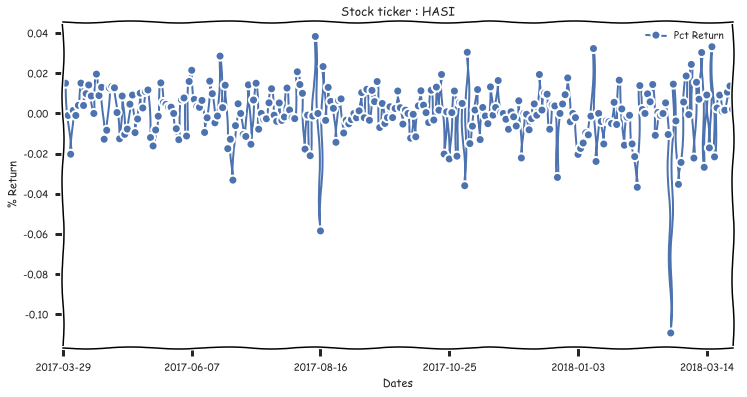

In [10]:
fig = HASI[['Pct Return']].plot(subplots=False,figsize=(12,6),marker='o')
labels = [item.get_text()[7:17] for item in fig.get_xticklabels()]
fig.set_xticklabels(labels)
plt.xlabel('Dates')
plt.ylabel('% Return')
plt.title('Stock ticker : HASI')
plt.show()

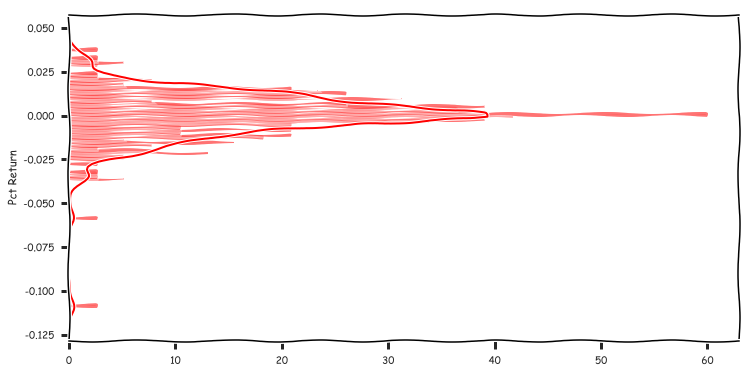

In [11]:
fig, ax = plt.subplots(figsize=(12,6))
sns.distplot(HASI['Pct Return'].dropna(),bins=100,color='red',vertical=True)


In [12]:
stocks
# Calculates daily percentage return of other stocks
PEGI['Pct Return'] = PEGI['Close'].pct_change()
CAFD['Pct Return'] = CAFD['Close'].pct_change()
BEP['Pct Return'] = BEP['Close'].pct_change()
CVA['Pct Return'] = CVA['Close'].pct_change()

In [13]:
PEGI.describe()


,Close,High,Low,Open,Volume,Pct Return
count,261.000000,261.000000,261.000000,261.000000,2.610000e+02,260.000000
mean,22.300670,22.537974,22.097997,22.326284,8.604793e+05,-0.000435
std,2.221811,2.198062,2.216190,2.207941,5.109636e+05,0.014085
min,16.950000,17.190000,16.580000,17.000000,0.000000e+00,-0.082391
25%,21.290000,21.490000,21.050000,21.260000,5.594860e+05,-0.005869
50%,22.130000,22.310000,21.920000,22.120000,7.466350e+05,0.000417
75%,24.150000,24.390000,23.950000,24.150000,1.054060e+06,0.008923
max,26.320000,26.560000,26.200000,26.350000,4.950741e+06,0.029079


In [14]:
CAFD.describe()

,Close,High,Low,Open,Volume,Pct Return
count,261.000000,261.000000,261.000000,261.000000,2.610000e+02,260.000000
mean,14.023410,14.150327,13.870503,14.016513,2.346291e+05,-0.000454
std,1.164573,1.165587,1.137879,1.156150,2.575537e+05,0.015134
min,11.700000,11.770000,11.510000,11.760000,0.000000e+00,-0.114967
25%,13.180000,13.360000,13.020000,13.240000,1.092260e+05,-0.006314
50%,14.420000,14.570000,14.290000,14.420000,1.680850e+05,0.000000
75%,14.950000,15.080000,14.750000,14.950000,2.709940e+05,0.007546
max,15.900000,15.920000,15.525000,15.690000,2.395320e+06,0.038244


In [15]:
BEP.describe()

,Close,High,Low,Open,Volume,Pct Return
count,261.000000,261.000000,261.000000,261.000000,261.000000,260.000000
mean,32.811951,33.030836,32.585901,32.834100,75400.636015,0.000252
std,1.515392,1.533458,1.512256,1.524876,42841.653320,0.010050
min,29.330000,29.582900,29.080000,29.160000,0.000000,-0.035422
25%,31.750000,31.920000,31.500000,31.870000,49283.000000,-0.004801
50%,33.150000,33.400000,32.932000,33.130000,66324.000000,0.000576
75%,33.950000,34.090000,33.660000,33.920000,92902.000000,0.005590
max,35.820000,36.000000,35.496400,35.850000,261187.000000,0.042998


In [16]:
CVA.describe()

,Close,High,Low,Open,Volume,Pct Return
count,261.000000,261.000000,261.000000,261.000000,2.610000e+02,260.000000
mean,14.971456,15.151782,14.804498,14.984674,1.049005e+06,-0.000119
std,0.963497,0.969727,0.953498,0.966384,8.154710e+05,0.016786
min,13.200000,13.300000,13.000000,13.100000,0.000000e+00,-0.085443
25%,14.350000,14.500000,14.200000,14.350000,7.155930e+05,-0.008929
50%,14.950000,15.100000,14.750000,14.950000,9.303760e+05,0.000000
75%,15.450000,15.600000,15.300000,15.450000,1.188443e+06,0.006717
max,17.200000,17.300000,17.150000,17.250000,1.130619e+07,0.096667


In [17]:
HASI_PCT = HASI['Pct Return'].reset_index(level='Symbol',drop=True)
HASI_PCT.index


DatetimeIndex(['2017-03-29', '2017-03-30', '2017-03-31', '2017-04-03',
               '2017-04-04', '2017-04-05', '2017-04-06', '2017-04-07',
               '2017-04-10', '2017-04-11',
               ...
               '2018-03-15', '2018-03-16', '2018-03-19', '2018-03-20',
               '2018-03-21', '2018-03-22', '2018-03-23', '2018-03-26',
               '2018-03-27', '2018-03-28'],
              dtype='datetime64[ns]', name=u'Date', length=261, freq=None)

In [18]:
PEGI_PCT = PEGI['Pct Return'].reset_index(level='Symbol',drop=True)
CAFD_PCT = CAFD['Pct Return'].reset_index(level='Symbol',drop=True)
BEP_PCT = BEP['Pct Return'].reset_index(level='Symbol',drop=True)
CVA_PCT = CVA['Pct Return'].reset_index(level='Symbol',drop=True)
PEGI_PCT.describe()

count    260.000000
mean      -0.000435
std        0.014085
min       -0.082391
25%       -0.005869
50%        0.000417
75%        0.008923
max        0.029079
Name: Pct Return, dtype: float64

In [19]:
Stocks_PCT = pd.concat([HASI_PCT.rename('HASI_PCT'), PEGI_PCT.rename('PEGI_PCT'), CAFD_PCT.rename('CAFD_PCT'), BEP_PCT.rename('BEP_PCT'), CVA_PCT.rename('CVA_PCT')],axis=1, join='inner')
Stocks_PCT.head()

,HASI_PCT,PEGI_PCT,CAFD_PCT,BEP_PCT,CVA_PCT
Date,,,,,
2017-03-29,NaN,NaN,NaN,NaN,NaN
2017-03-30,0.015060,-0.004480,-0.004338,-0.002364,0.006515
2017-03-31,-0.000989,0.006500,-0.014524,0.006432,0.016181
2017-04-03,-0.020297,-0.006955,-0.030951,-0.013454,-0.015924
2017-04-04,0.001516,0.009005,-0.004563,0.003069,0.003236


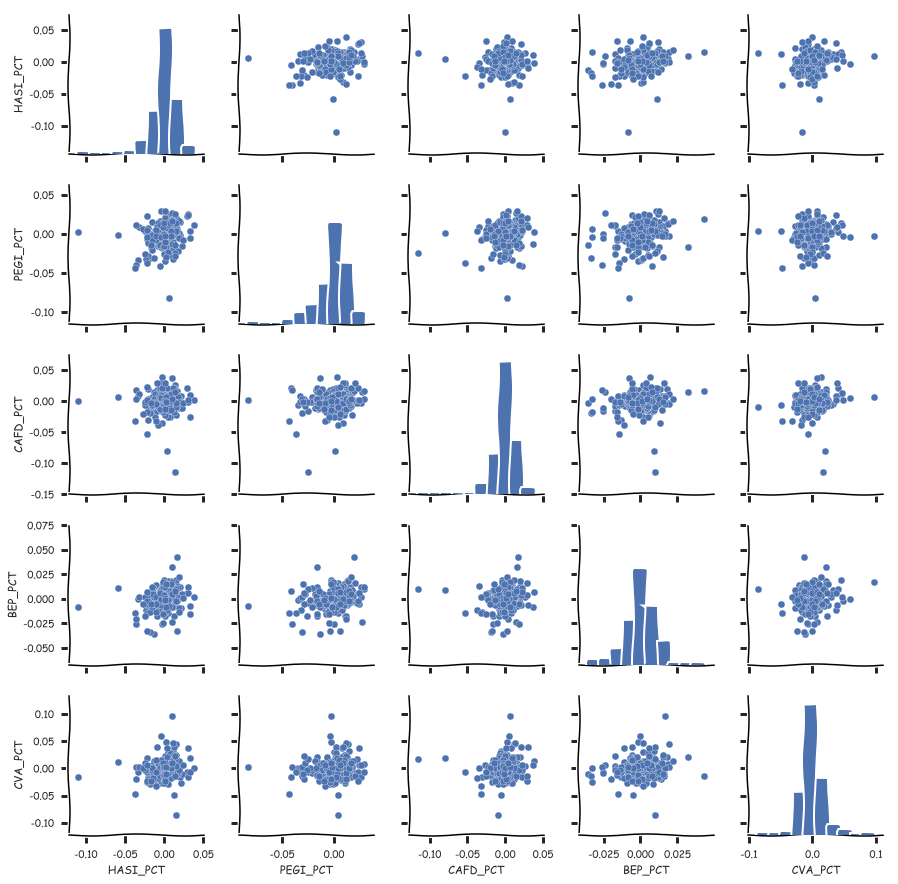

In [20]:
sns.pairplot(Stocks_PCT.dropna())

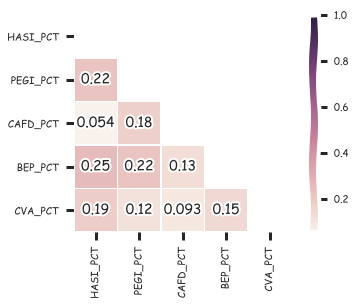

In [21]:
# Compute the correlation matrix
corr = Stocks_PCT.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask,square=True, linewidths=.5, annot=True)

In [22]:
# Worst expected daily performance
Stocks_PCT.quantile(0.05)

HASI_PCT   -0.021640
PEGI_PCT   -0.028691
CAFD_PCT   -0.022649
BEP_PCT    -0.015939
CVA_PCT    -0.023194
Name: 0.05, dtype: float64

In [23]:
# Best expected daily performance
Stocks_PCT.quantile(0.95)

HASI_PCT    0.018681
PEGI_PCT    0.017742
CAFD_PCT    0.020229
BEP_PCT     0.015120
CVA_PCT     0.024403
Name: 0.95, dtype: float64

# Predicting Future Stock Prices

In [24]:
days = 180

# Refer: https://www.investopedia.com/articles/07/montecarlo.asp
mu = Stocks_PCT['HASI_PCT'].mean()
sigma = Stocks_PCT['HASI_PCT'].std()

### Monte Carlo for Future Stock Prices based on Brownian Motion

In [27]:
# Using stock price, Period of interest (in days), mu and sigma
def GBM_MC(current_value,days,mu,sigma):
    
    value = np.zeros(days)
    value[0] = current_value
    
    # Using terms defined in Investopedia
    dt = 1/days
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for i in xrange(1,days):
        shock[i] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[i] = mu * dt
        
        # New value
        value[i] = value[i-1] + (value[i-1] * (drift[i]+shock[i]))
        
    return value

In [28]:
HASI['Close'].tail()

Symbol  Date      
HASI    2018-03-22    18.80
        2018-03-23    18.83
        2018-03-26    19.03
        2018-03-27    19.29
        2018-03-28    19.33
Name: Close, dtype: float64

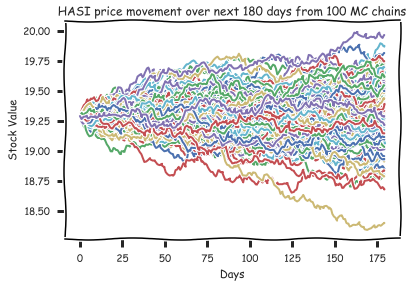

In [29]:
current_value = 19.29

for j in xrange(100): # For visualization purposes we restrict to only 100 MC chains 
    plt.plot(GBM_MC(current_value,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Stock Value')
plt.title('HASI price movement over next 180 days from 100 MC chains')

Our next goal is to obtain a histogram of potential stock value 180 days from today. This will also allow us to calculate the lowest possible stock price with certain confidence, say 95%. We can then compute the max possible loss (sometimes referred to as Value at Risk), if we were to stay invested in a stock over next 180 days. Here we will simulate 10000 MC chains.

In [33]:
MC_runs = 10000

final_value = np.zeros(MC_runs)

for MC_run in xrange(MC_runs):
    final_value[MC_run] = GBM_MC(current_value,days,mu,sigma)[days-1]
q5 = np.percentile(final_value,5)



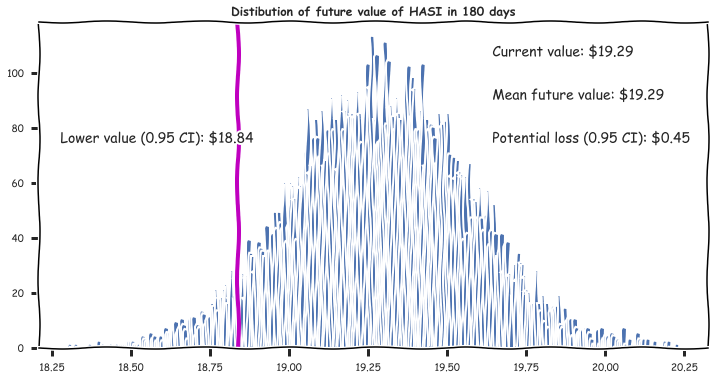

In [39]:
fig1 = plt.figure(figsize=(12,6))
plt.hist(final_value,bins=300)

plt.figtext(0.65,0.8,s="Current value: $%.2f" %current_value)

plt.figtext(0.65,0.7,"Mean future value: $%.2f" % final_value.mean())

plt.figtext(0.65,0.6,"Potential loss (0.95 CI): $%.2f" % (current_value - q5,))

plt.figtext(0.15,0.6, "Lower value (0.95 CI): $%.2f" % q5)

plt.axvline(x=q5, linewidth=4, color='m')

plt.title(u"Distibution of future value of HASI in %s days" %days, weight='bold')